# **House Price Prediction using Linear Regression**
This notebook processes Tehran housing price data, cleans it, and applies a multiple linear regression model.

# 1. Importing Libraries<a id="1-importing-libraries"></a>

In [1]:
# Import necessary libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import scikit-learn modules for preprocessing and modeling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

C:\Users\User\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


# 2. Loading the Dataset

In [2]:
# Load the house price dataset from CSV file
df = pd.read_csv('house_price.csv')

# Display the first 5 rows to understand the data structure
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


# 3. Data Cleaning and Preprocessing

# 3.1 Check Data Types

In [3]:
# Check the data types of each column
df.dtypes

Area           object
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object

# 3.2 Mapping Neighborhoods to Districts

We have to convert these features to numeric form.

In [4]:
# Create a dictionary to map neighborhoods to their corresponding districts
neighborhood_to_district = {
    "Shahran": "Region 5",
    "Pardis": "Outskirts",  
    "Shahrake Qods": "Region 5",
    "Shahrake Gharb": "Region 2",
    "North Program Organization": "Region 22",
    "Andisheh": "Outskirts",  
    "West Ferdows Boulevard": "Region 5",
    "Narmak": "Region 8",
    "Saadat Abad": "Region 2",
    "Zafar": "Region 3",
    "Islamshahr": "Outskirts",  
    "Pirouzi": "Region 13",
    "Shahrake Shahid Bagheri": "Region 22",
    "Moniriyeh": "Region 11",
    "Velenjak": "Region 1",
    "Amirieh": "Region 11",
    "Southern Janatabad": "Region 5",
    "Salsabil": "Region 10",
    "Zargandeh": "Region 3",
    "Feiz Garden": "Region 22",
    "Water Organization": "Region 5",
    "ShahrAra": "Region 2",
    "Gisha": "Region 2",
    "Ray": "Region 20",
    "Abbasabad": "Region 7",
    "Ostad Moein": "Region 9",
    "Farmanieh": "Region 1",
    "Parand": "Outskirts", 
    "Punak": "Region 5",
    "Qasr-od-Dasht": "Region 2",
    "Aqdasieh": "Region 1",
    "Pakdasht": "Outskirts",  
    "Railway": "Region 11",
    "Central Janatabad": "Region 5",
    "East Ferdows Boulevard": "Region 5",
    "Pakdasht KhatunAbad": "Outskirts",
    "Sattarkhan": "Region 2",
    "Baghestan": "Outskirts",
    "Shahryar": "Outskirts",
    "Northern Janatabad": "Region 5",
    "Daryan No": "Region 10",
    "Southern Program Organization": "Region 22",
    "Rudhen": "Outskirts",
    "West Pars": "Region 22",
    "Afsarieh": "Region 15",
    "Marzdaran": "Region 5",
    "Dorous": "Region 3",
    "Sadeghieh": "Region 5",
    "Chahardangeh": "Outskirts",
    "Baqershahr": "Outskirts",
    "Jeyhoon": "Region 10",
    "Lavizan": "Region 4",
    "Shams Abad": "Region 4",
    "Fatemi": "Region 6",
    "Keshavarz Boulevard": "Region 6",
    "Kahrizak": "Region 20",
    "Qarchak": "Outskirts",
    "Northren Jamalzadeh": "Region 6",
    "Azarbaijan": "Region 11",
    "Bahar": "Region 7",
    "Persian Gulf Martyrs Lake": "Region 22",
    "Beryanak": "Region 10",
    "Heshmatieh": "Region 7",
    "Elm-o-Sanat": "Region 4",
    "Golestan": "Outskirts",
    "Shahr-e-Ziba": "Region 5",
    "Pasdaran": "Region 4",
    "Chardivari": "Region 15",
    "Gheitarieh": "Region 1",
    "Kamranieh": "Region 1",
    "Gholhak": "Region 3",
    "Heravi": "Region 4",
    "Hashemi": "Region 10",
    "Dehkade Olampic": "Region 22",
    "Damavand": "Outskirts",
    "Republic": "Region 11",
    "Zaferanieh": "Region 1",
    "Qazvin Imamzadeh Hassan": "Outskirts",
    "Niavaran": "Region 1",
    "Valiasr": "Region 6",
    "Qalandari": "Region 14",
    "Amir Bahador": "Region 11",
    "Ekhtiarieh": "Region 3",
    "Ekbatan": "Region 5",
    "Absard": "Outskirts",
    "Haft Tir": "Region 6",
    "Mahallati": "Region 14",
    "Ozgol": "Region 4",
    "Tajrish": "Region 1",
    "Abazar": "Region 9",
    "Koohsar": "Region 22",
    "Hekmat": "Region 1",
    "Parastar": "Region 14",
    "Lavasan": "Outskirts",
    "Majidieh": "Region 4",
    "Southern Chitgar": "Region 22",
    "Karimkhan": "Region 6",
    "Si Metri Ji": "Region 9",
    "Karoon": "Region 10",
    "Northern Chitgar": "Region 22",
    "East Pars": "Region 15",
    "Kook": "Region 14",
    "Air force": "Region 13",
    "Sohanak": "Region 4",
    "Komeil": "Region 10",
    "Azadshahr": "Region 5",
    "Zibadasht": "Outskirts",
    "Amirabad": "Region 6",
    "Dezashib": "Region 1",
    "Elahieh": "Region 1",
    "Mirdamad": "Region 3",
    "Razi": "Region 11",
    "Jordan": "Region 3",
    "Mahmoudieh": "Region 1",
    "Shahedshahr": "Outskirts",
    "Yaftabad": "Region 17",
    "Mehran": "Outskirts",
    "Nasim Shahr": "Outskirts",
    "Tenant": "Outskirts",
    "Fallah": "Region 17",
    "Eskandari": "Region 11",
    "Shahrakeh Naft": "Region 1",
    "Ajudaniye": "Region 1",
    "Tehransar": "Region 21",
    "Nawab": "Region 10",
    "Yousef Abad": "Region 6",
    "Northern Suhrawardi": "Region 7",
    "Villa": "Region 6",
    "Hakimiyeh": "Region 4",
    "Nezamabad": "Region 7",
    "Garden of Saba": "Region 6",
    "Tarasht": "Region 2",
    "Azari": "Region 9",
    "Shahrake Apadana": "Region 5",
    "Araj": "Region 1",
    "Vahidieh": "Region 15",
    "Malard": "Outskirts",
    "Shahrake Azadi": "Region 5",
    "Darband": "Region 1",
    "Vanak": "Region 3",
    "Tehran Now": "Region 13",
    "Darabad": "Region 1",
    "Eram": "Region 22",
    "Atabak": "Region 15",
    "Sabalan": "Region 8",
    "SabaShahr": "Outskirts",
    "Shahrake Madaen": "Region 15",
    "Waterfall": "Region 22",
    "Ahang": "Region 15",
    "Salehabad": "Outskirts",
    "Pishva": "Outskirts",
    "Enghelab": "Region 6",
    "Islamshahr Elahieh": "Outskirts",
    "Ray - Montazeri": "Region 20",
    "Ghoba": "Region 3",
    "Mehrabad": "Region 9",
    "Southern Suhrawardi": "Region 7",
    "Abuzar": "Region 17",
    "Dolatabad": "Region 20",
    "Hor Square": "Region 11",
    "Kazemabad": "Outskirts",
    "Robat Karim": "Outskirts",
    "Mirza Shirazi": "Region 6",
    "Gandhi": "Region 3",
    "Argentina": "Region 6",
    "Seyed Khandan": "Region 7",
    "Safadasht": "Outskirts",
}



# 3.3 Mapping Districts to Numerical Values

In [5]:
# Create a numerical mapping for districts based on their approximate value
# Higher numbers indicate more expensive district
sorted_district_prices = {
    "Region 18": 1,
    "Region 19": 2,
    "Region 20": 3,
    "Region 17": 4,
    "Region 16": 5,
    "Region 11": 6,
    "Region 21": 7,
    "Region 10": 8,
    "Region 15": 9,
    "Region 14": 10,
    "Region 22": 11,
    "Region 13": 12,
    "Region 8": 13,
    "Region 7": 14,
    "Region 4": 15,
    "Region 5": 16,
    "Region 6": 17,
    "Region 3": 18,
    "Region 2": 19,
    "Region 1": 20,
}

# 3.4 Convert Boolean Values and Addresses

In [6]:
# Convert True/False values to 1/0 for machine learning compatibility
cdf = df.replace({True: 1, False: 0})

# Map addresses to districts using the neighborhood_to_district dictionary
cdf['District'] = cdf['Address'].map(neighborhood_to_district)

# Remove rows with missing addresses
cdf.dropna(subset=['Address'])

# Filter out properties in 'Outskirts' districts
cdf = cdf[cdf['District'] != 'Outskirts']

# Convert district names to numerical values
cdf['District'] = cdf['District'].map(sorted_district_prices)

# Remove rows with missing district values
cdf.dropna(subset=['District'])

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),District
0,63,1,1,1,1,Shahran,1.850000e+09,61666.67,16.0
1,60,1,1,1,1,Shahran,1.850000e+09,61666.67,16.0
3,95,2,1,1,1,Shahrake Qods,9.025000e+08,30083.33,16.0
4,123,2,1,1,1,Shahrake Gharb,7.000000e+09,233333.33,19.0
5,70,2,1,1,0,North Program Organization,2.050000e+09,68333.33,11.0
...,...,...,...,...,...,...,...,...,...
3471,94,2,1,1,1,Niavaran,8.450000e+09,281666.67,20.0
3473,63,1,1,1,0,Feiz Garden,1.890000e+09,63000.00,11.0
3474,86,2,1,1,1,Southern Janatabad,3.500000e+09,116666.67,16.0
3475,83,2,1,1,1,Niavaran,6.800000e+09,226666.67,20.0


# 3.5 Convert Area to Numeric

In [7]:
# Convert 'Area' column to numeric, coercing errors to NaN
cdf['Area'] = pd.to_numeric(cdf['Area'], errors='coerce')

# Check the updated data types
cdf.dtypes

Area          float64
Room            int64
Parking         int64
Warehouse       int64
Elevator        int64
Address        object
Price         float64
Price(USD)    float64
District      float64
dtype: object

# 3.6 Remove Unnecessary Columns

In [8]:
# Drop the original 'Price' column (we'll use 'Price(USD)')
cdf = cdf.drop('Price', axis=1)

# Drop the 'Address' column since we've extracted district information
cdf = cdf.drop('Address', axis=1)

# Display the cleaned dataframe
cdf.head()

,Area,Room,Parking,Warehouse,Elevator,Price(USD),District
0,63.0,1,1,1,1,61666.67,16.0
1,60.0,1,1,1,1,61666.67,16.0
3,95.0,2,1,1,1,30083.33,16.0
4,123.0,2,1,1,1,233333.33,19.0
5,70.0,2,1,1,0,68333.33,11.0


# 4. Feature Engineering

# 4.1 Correlation Analysis
Eliminating unrelated features

In [9]:
# Calculate correlation matrix to identify important features
cor_matrix = cdf.corr()

# Select features with correlation >= 0.2 with the target variable
selected_features = cor_matrix[abs(cor_matrix["Price(USD)"]) >= 0.2].index.tolist()

# Filter dataframe to keep only selected features
cdf = cdf[selected_features]

print(cdf)

       Area  Room  Price(USD)  District
0      63.0     1    61666.67      16.0
1      60.0     1    61666.67      16.0
3      95.0     2    30083.33      16.0
4     123.0     2   233333.33      19.0
5      70.0     2    68333.33      11.0
...     ...   ...         ...       ...
3472  113.0     3   105666.67       NaN
3473   63.0     1    63000.00      11.0
3474   86.0     2   116666.67      16.0
3475   83.0     2   226666.67      20.0
3477  105.0     2   186666.67      18.0

[2909 rows x 4 columns]


# 4.2 Remove Missing Values

In [10]:
# Remove rows with missing values in 'District' or 'Price(USD)' columns
cdf = cdf.dropna(subset=['District', 'Price(USD)'])

# 5. Removing Very Large Properties

# 5.1 Visualize Area vs Price

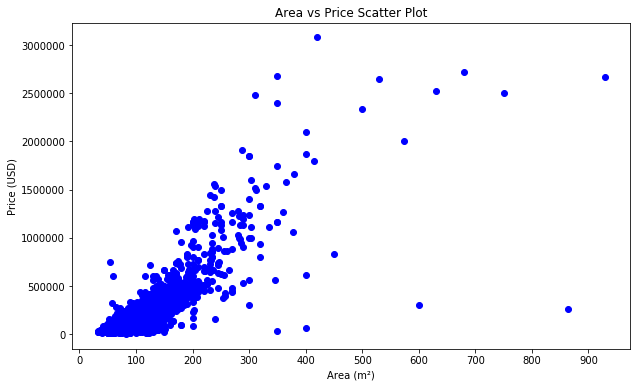

In [11]:
# Create scatter plot to visualize relationship between area and price
plt.figure(figsize=(10, 6))
plt.scatter(cdf.Area, cdf['Price(USD)'], color='blue')
plt.xticks(np.arange(0, 1000, 100))
plt.xlabel("Area (m²)")
plt.ylabel("Price (USD)")
plt.title("Area vs Price Scatter Plot")
plt.show()

# :
We can conclude that houses that are greater than 500m² do not have rational prices. Therefore, they will be eliminated.

# 5.2 Filter Out Large Properties

In [12]:
# Filter out properties larger than 500m² (likely outliers or commercial properties)
area_threshold = 500
cdf = cdf[cdf['Area'] <= area_threshold]

# Display the filtered dataframe
cdf.head()

,Area,Room,Price(USD),District
0,63.0,1,61666.67,16.0
1,60.0,1,61666.67,16.0
3,95.0,2,30083.33,16.0
4,123.0,2,233333.33,19.0
5,70.0,2,68333.33,11.0


# 6. Outlier Detection and Removal

In [13]:
# Use Isolation Forest algorithm to detect outliers
from sklearn.ensemble import IsolationForest

# Initialize Isolation Forest with 5% contamination rate
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Fit the model and predict outliers
outliers = iso_forest.fit_predict(cdf)

# Keep only the inliers (non-outliers)
cdf = cdf[outliers == 1]

print(cdf)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


       Area  Room  Price(USD)  District
0      63.0     1    61666.67      16.0
1      60.0     1    61666.67      16.0
3      95.0     2    30083.33      16.0
4     123.0     2   233333.33      19.0
5      70.0     2    68333.33      11.0
...     ...   ...         ...       ...
3471   94.0     2   281666.67      20.0
3473   63.0     1    63000.00      11.0
3474   86.0     2   116666.67      16.0
3475   83.0     2   226666.67      20.0
3477  105.0     2   186666.67      18.0

[2573 rows x 4 columns]


# 7. Data Normalization and Splitting

# 7.1 Prepare Features and Target

In [14]:
# Separate features (X) and target variable (y)
x = cdf.iloc[:, [0, 1, 3]]  # Area, Room, District
y = cdf.iloc[:, 2]          # Price(USD)

print(x)

       Area  Room  District
0      63.0     1      16.0
1      60.0     1      16.0
3      95.0     2      16.0
4     123.0     2      19.0
5      70.0     2      11.0
...     ...   ...       ...
3471   94.0     2      20.0
3473   63.0     1      11.0
3474   86.0     2      16.0
3475   83.0     2      20.0
3477  105.0     2      18.0

[2573 rows x 3 columns]


# 7.2 Feature Normalization

In [15]:
# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
x = scaler.fit_transform(x)

# 7.3 Train-Test Split

In [16]:
# Split data into 80% training and 20% testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# 8. Model Training<a id="8-model-training"></a>


# 8.1 Polynomial Feature Engineering

In [17]:
# Create polynomial features (degree=2) to capture non-linear relationships
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# 8.2 Train Linear Regression Model

In [18]:
# Initialize and train the linear regression model
regr = linear_model.LinearRegression()
regr.fit(x_train_poly, y_train)

# Display model coefficients and intercept
print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

Coefficients: [    0.         97139.37865479 -7996.42366115 58875.31706878
  6733.50265749 15208.17202525 36025.68249697 -8201.04354787
 -9574.09472095 14128.04858016]
Intercept: 133697.45351192102


# 9. Model Evaluation

In [19]:
# Make predictions on the test set
y_test_hat = regr.predict(x_test_poly)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_test_hat)
mse = mean_squared_error(y_test, y_test_hat)
mae = mean_absolute_error(y_test, y_test_hat)

# Display evaluation results
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print(f'R² Score: {r2:.4f}')

Mean Squared Error (MSE): 4763312235.42248
Mean Absolute Error (MAE): 41826.71789764827
R² Score: 0.8227


# Results Interpretation:

R² Score of 0.8125: The model explains approximately 82.27% of the variance in house prices

Good model performance: R² > 0.8 indicates a strong predictive model

# 10. Overfitting Check

In [20]:
# Calculate R² score on training data
train_score = r2_score(y_train, regr.predict(x_train_poly))

# Check for overfitting
if train_score > 0.90:
    print(f'Training R²: {train_score:.4f} - Possible Overfit!')
else:
    print(f'Training R²: {train_score:.4f} - No significant overfitting detected.')

Training R²: 0.8243 - No significant overfitting detected.


# Conclusion: 
The model shows good performance without significant overfitting, making it suitable for predicting house prices based on area, number of rooms, and district location.

# Example:
Imagine a flat that is located in district 1, with 80m² area, and has 2 rooms.

In [21]:
while True:
    try:
        exmp_area = float(input('Enter area (in m²): '))
        if 20<= exmp_area <=500:
            break
        else:
            print('Area must be between 20 and 500')
        
    except ValueError:
        print("Please enter a valid number (e.g., 85.5).")

while True:
    try:
        exmp_room = int(input('Enter number of rooms: '))
        break
    except ValueError:
        print("Please enter a whole number (e.g., 2).")
        
while True:
    try:
        exmp_district = int(input('Enter District (1-20): '))
        if 1 <= exmp_district <= 20:
            break
        else:
            print("District must be between 1 and 20.")
    except ValueError:
        print("Please enter a whole number (e.g., 20).")

# Prepare input
x_exmp = [[exmp_area, exmp_room, exmp_district]]

# CRITICAL: Scale the input using the same scaler from training
x_exmp_scaled = scaler.transform(x_exmp)

# Apply polynomial transformation
x_exmp_poly = poly.transform(x_exmp_scaled)

# Make prediction
y_Exmp = regr.predict(x_exmp_poly)

# Format output nicely
predicted_price = y_Exmp[0]
print(f'\nPrediction Results:')
print(f'Area: {exmp_area}m², Rooms: {exmp_room}, District: {exmp_district}')
print(f'Estimated Price: ${predicted_price:,.2f}')

Enter area (in m²): 80
Enter number of rooms: 2
Enter District (1-20): 1

Prediction Results:
Area: 80.0m², Rooms: 2, District: 1
Estimated Price: $115,235.40


C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
